# Sentiment prediction

In [1]:
from textblob import TextBlob
import nltk
from newspaper import Article

import requests
from bs4 import BeautifulSoup
import re


import matplotlib
print("matplotlib", matplotlib.__version__)

%matplotlib inline
import matplotlib.pyplot as plt

matplotlib 3.1.1


In [2]:
search = "air nz news"
results = 10 # valid options 10, 20, 30, 40, 50, and 100
page = requests.get("https://www.google.com/search?q={}&num={}".format(search, results))
soup = BeautifulSoup(page.content, "html5lib")
links = soup.findAll("a")
link_list = []
for link in links :
    link_href = link.get('href')
    if "url?q=" in link_href and not "webcache" in link_href:
        link_list.append((link.get('href').split("?q=")[1].split("&sa=U")[0]))

In [3]:
#Get the article
sentiments = []

for url in link_list:
    try:
        article = Article(url)

        # Do some NLP
        article.download() #Downloads the link’s HTML content
        article.parse() #Parse the article
        #nltk.download('punkt')#uncomment and run when running for the first time
        article.nlp()#  Keyword extraction wrapper

        text = article.summary

        obj = TextBlob(text)
        #returns the sentiment of text
        #by returning a value between -1.0 and 1.0
        sentiment = obj.sentiment.polarity
        print("Sentiment is: ", sentiment, "\nfrom",url)
        sentiments.append(sentiment)
    except:
        print("error", "\nfrom", url)
        

Sentiment is:  0.0 
from https://www.airnewzealand.co.nz/media-releases
Sentiment is:  0.062215909090909086 
from https://www.airnewzealand.co.nz/travel-alerts
error 
from https://www.nzherald.co.nz/business/news/article.cfm%3Fc_id%3D3%26objectid%3D12286260
error 
from https://www.nzherald.co.nz/nz/news/article.cfm%3Fc_id%3D1%26objectid%3D12290201
Sentiment is:  0.4 
from https://www.tvnz.co.nz/one-news/air-new-zealand
Sentiment is:  0.024431818181818176 
from https://www.newshub.co.nz/home/travel/2019/11/air-nz-cancels-holiday-season-flights-during-due-to-engine-issues.html
Sentiment is:  0.024431818181818176 
from https://www.newshub.co.nz/home/travel/2019/11/air-nz-cancels-holiday-season-flights-during-due-to-engine-issues.html
Sentiment is:  0.35 
from https://www.newshub.co.nz/home/travel/2019/11/air-nz-unveils-les-mills-low-impact-in-flight-workout-for-passengers.html
Sentiment is:  0.13897727272727273 
from https://www.stuff.co.nz/travel/news/117497136/air-new-zealand-internatio

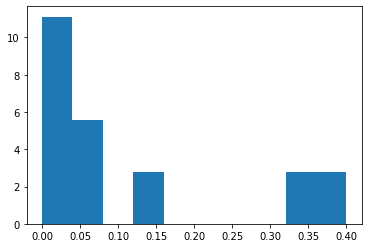

In [4]:
plt.hist(sentiments, bins = results, density = True);